### NHẬN THẤY
 * KIỂM TRA SỐ LƯỢNG REQUEST CỦA 1 ĐỊA CHỈ IP TRONG MỘT KHOẢNG THỜI GIAN 
 
### MỤC TIÊU

 * LIỆT KÊ ĐƯỢC NHỮNG ĐỊA CHỈ IP CÓ SỐ LƯỢNG REQUEST LỚN TRONG MỘT KHOẢNG THỜI GIAN ( VÍ DỤ NHƯ TRONG KHOẢNG 1 PHÚT)
 * XÁC ĐỊNH ĐƯỢC NGƯỠNG MÀ MỘT IP CÓ THỂ CHO PHÉP SỐ LƯỢNG REQUEST CHO PHÉP TRONG MỘT KHOẢNG THỜI GIAN NHẤT ĐỊNH
 * TÍM SỐ LƯỢNG REQUEST TRONG MỘT GIỜ CÓ KHẢ NĂNG XẢY RA CAO NHẤT CŨNG CHÍNH LÀ XÁC ĐỊNH NGƯỠNG

### HƯỚNG GIẢI QUYẾT
 * HIỂN THỊ BIỂU ĐỒ TẦN SUẤT CỦA MỘT IP TRONG KHOẢNG 1 PHÚT HOẶC 15 PHÚT HOẶC 1 GIỜ 
 * LỰA CHỌN PHÂN PHỐI PHÙ HỢP VỚI TẬP DỮ LIỆU
 * TÌM GIỚI HẠN PHÙ HỢP ĐỂ NHẬN BIẾT ĐƯỢC GIỚI HẠN SỐ LƯỢNG REQUEST BẤT THƯỜNG
 * LIỆT KÊ CÁC ĐỊA CHỈ IP CÓ SÔ LƯỢNG REQUEST BẤT THƯỜNG TRONG

In [12]:
import pandas as pd
import numpy as np

In [13]:
col_names = ['time_stamp', 'source', 'message']
# col_names = ['ip_address', 'time_stamp', 'request', 'status_code', 'response_size', 'user_agent']

file_path = '../dataset/access_log_1.csv'
data = pd.read_csv(file_path, header = 0 , names = col_names)

In [14]:
data['time_stamp'] = pd.to_datetime(data['time_stamp'])

In [15]:
data['timestamp'] = pd.to_datetime(data['time_stamp'], format='%Y-%m-%d %H:%M:%S.%f%z')
# data['timestamp'] = data['timestamp'].dt.strftime('%Y-%m-%d %H')
data.head()

,time_stamp,source,message,timestamp
0,2023-06-12 07:35:29.018000+00:00,VNG_baobd2,Nginx Query,2023-06-12 07:35:29.018000+00:00
1,2023-06-12 07:36:55.025000+00:00,103.245.252.19,Nginx Query,2023-06-12 07:36:55.025000+00:00
2,2023-06-12 07:36:55.032000+00:00,103.245.252.19,Nginx Query,2023-06-12 07:36:55.032000+00:00
3,2023-06-12 07:37:25.001000+00:00,103.245.252.75,Nginx Query,2023-06-12 07:37:25.001000+00:00
4,2023-06-12 07:41:31.223000+00:00,103.245.252.19,Nginx Query,2023-06-12 07:41:31.223000+00:00


0       2
1       1
2       3
3       2
4       2
       ..
322    12
323     6
324    48
325    15
326     2
Name: count, Length: 327, dtype: int64
0       2
1       1
2       3
3       2
4       2
       ..
322    12
323     6
324    48
325    15
326     2
Name: count, Length: 327, dtype: int64


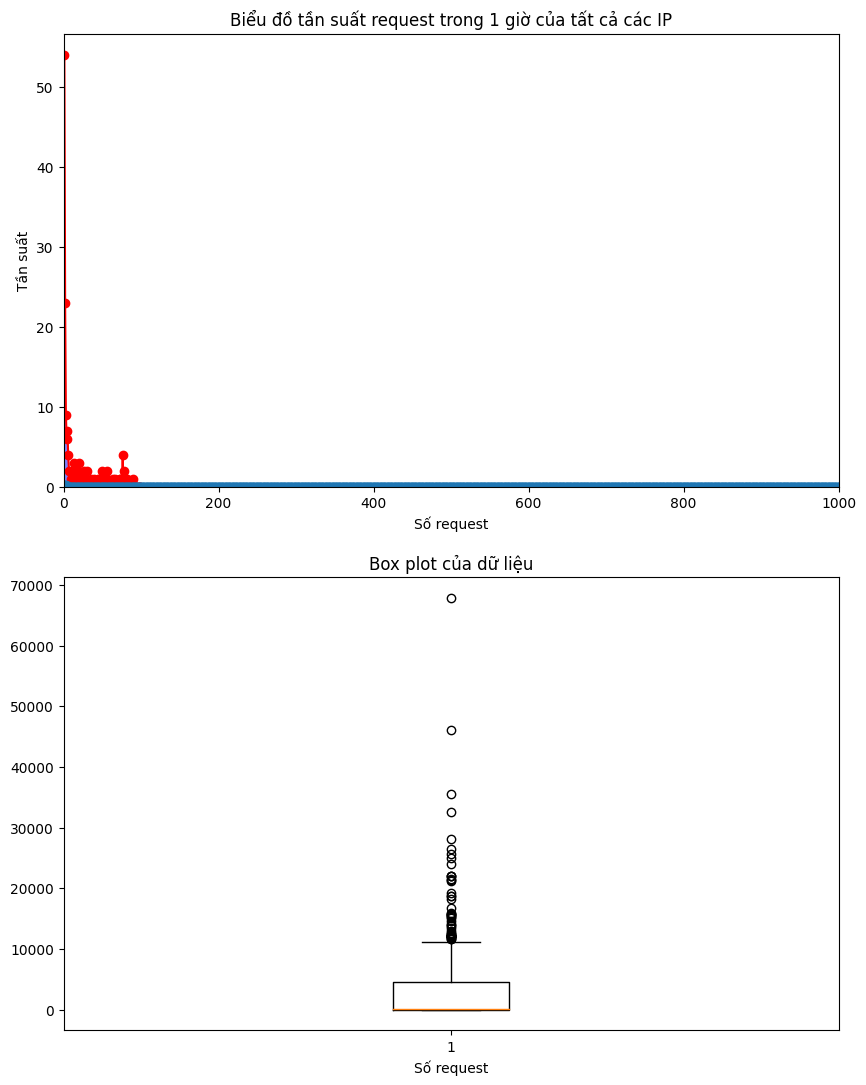

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy.stats import poisson

data['minute'] = data['timestamp'].dt.floor('H')
grouped = data.groupby(['source', 'minute']).size().reset_index(name='count')
plt.figure(figsize=(10, 20))


lambda_val = 2
x_values = np.arange(0, 70000)
poisson_probs = poisson.pmf(x_values, lambda_val)

print(grouped['count'])

plt.subplot(3,1,1)
counts, bins, _ = plt.hist(grouped['count'], bins=100, alpha=0.5, color='blue', range=(grouped['count'].min(), 100))
plt.plot(bins[:-1], counts, '-ro')
plt.plot(x_values, poisson_probs, '-o')
plt.xlim(0, 1000)
plt.title('Biểu đồ tần suất request trong 1 giờ của tất cả các IP')
plt.xlabel('Số request')
plt.ylabel('Tần suất')

plt.subplot(3,1,2)
plt.boxplot(grouped['count'])
plt.title('Box plot của dữ liệu')
plt.xlabel('Số request')
plt.ylabel('')


# plt.subplot(3,1,3)

# values, counts = np.unique(data, return_counts=True)
# pmf = counts / len(data)

# plt.plot(kde_x, kde_y, color = "blue",)
# plt.title('Box plot của dữ liệu')
# plt.xlabel('Số request')
# plt.ylabel('')
print(grouped['count'])

# print(grouped)

# plt.subplot(2,2,3)
# sns.kdeplot(grouped['count'])
# plt.title('Box plot của dữ liệu')
# plt.xlabel('Số request')
# plt.ylabel('')


# Hiển thị biểu đồ
plt.show()

In [17]:
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.stats import chi2

# # Tạo mẫu dữ liệu phân phối chi bình phương với độ tự do df=5
# df = 1
# data = np.random.chisquare(df, size=1000)
# print(data)

# # Vẽ biểu đồ histogram của mẫu dữ liệu
# plt.hist(data, bins=20, density=True, alpha=0.6, color='g')

# # Vẽ đường cong phân phối chuẩn
# x = np.linspace(0, 20, 100)
# plt.plot(x, chi2.pdf(x, df), 'r-', lw=2)

# # Hiển thị biểu đồ
# plt.title('Histogram of Chi-Square Distribution')
# plt.xlabel('Value')
# plt.ylabel('Frequency')
# plt.show()

       count
1         54
2         23
3          9
5          7
4          6
...      ...
21510      1
18741      1
21387      1
16006      1
15         1

[211 rows x 1 columns]
 gia tri ky vong:  1.5497630331753554
1 67849
0.7877017244851816
6.55316604715291


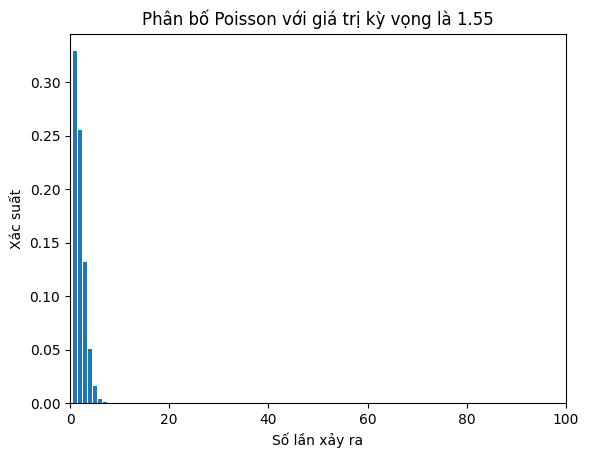

In [18]:
import pandas as pd
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt

count_mu = grouped['count'].value_counts().to_frame()
print(count_mu)
mu = count_mu['count'].mean()
print(
    ' gia tri ky vong: ',count_mu['count'].sum() / count_mu['count'].count())
count_mu = count_mu.rename_axis('number_of_request').reset_index()


k_values = np.arange(count_mu['number_of_request'].min(), count_mu['number_of_request'].max())
print(count_mu['number_of_request'].min(), count_mu['number_of_request'].max())
poisson_probs = poisson.pmf(k_values,mu)

# print(k_values.sum())
print(poisson_probs.sum())


# tính toán giá trị trung bình và độ lệch chuẩn của phân phối Poisson
mean = np.mean(count_mu['count'])
std_dev = np.sqrt(mean)

# tính toán ngưỡng phù hợp
k = count_mu['count'].std()   # số lần độ lệch chuẩn
threshold = mean + k * std_dev

print(threshold)

plt.bar(k_values, poisson_probs)
plt.xlim(0, 100)
plt.xlabel('Số lần xảy ra')
plt.ylabel('Xác suất')
plt.title('Phân bố Poisson với giá trị kỳ vọng là {:.2f}'.format(mu))
plt.show()




In [19]:
# request_counts_of_day = data['timestamp'].value_counts().to_frame()
# print(request_counts_of_day)
# import matplotlib.pyplot as plt

# fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 20))
# fig.suptitle("Tần suất số lượng request trong 1 giờ")

# request_counts_of_day[["timestamp"]].hist(bins=20, ax=axes[0][0], range = (0, 20000));
# request_counts_of_day[["timestamp"]].boxplot(ax=axes[0][1], vert=False);
# request_counts_of_day[["timestamp"]].plot.kde(ax=axes[2][0])

In [20]:
# import pandas as pd
# from scipy.stats import norm

# # Tạo DataFrame mẫu
# request_counts_of_day['pdf'] = norm.pdf(request_counts_of_day["timestamp"])
# request_counts_of_day['cdf'] = norm.cdf(request_counts_of_day['timestamp'])

# print(request_counts_of_day['pdf'])

4.56642155537461


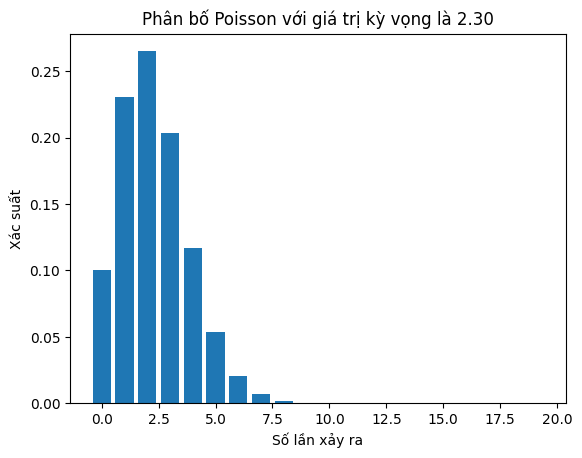

In [21]:
import pandas as pd
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt

# Tạo dataframe với số lần xảy ra sự kiện
data = {'occurrence': [2, 3, 1, 4, 5, 2, 1, 0, 3, 2]}
df = pd.DataFrame(data)

# Tính giá trị kỳ vọng của phân phối Poisson từ dữ liệu
mu = df['occurrence'].mean()

# Tính xác suất của các giá trị số lần xảy ra khác nhau từ phân phối Poisson
k_values = np.arange(0, 20)
poisson_probs = poisson.pmf(k_values, mu)

# print(poisson_probs.sum())
# print(poisson_probs.argmax())

# tính toán giá trị trung bình và độ lệch chuẩn của phân phối Poisson
mean = np.mean(data['occurrence'])
std_dev = np.sqrt(mean)

# tính toán ngưỡng phù hợp
k = df['occurrence'].std()   # số lần độ lệch chuẩn
threshold = mean + k * std_dev

print(threshold)

# Vẽ biểu đồ phân bố của phân phối Poisson
plt.bar(k_values, poisson_probs)
plt.xlabel('Số lần xảy ra')
plt.ylabel('Xác suất')
plt.title('Phân bố Poisson với giá trị kỳ vọng là {:.2f}'.format(mu))
plt.show()


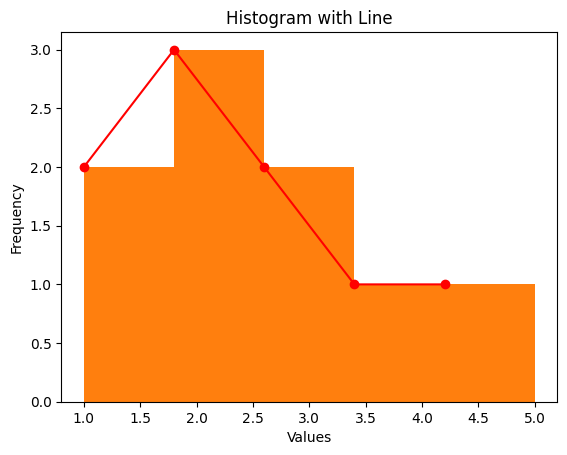

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Dữ liệu mẫu
data = np.array([1, 1, 2, 2, 2, 3, 3, 4, 5])

# Vẽ histogram
plt.hist(data, bins='auto')

# Lấy thông tin về các đỉnh cột của histogram
counts, bins, _ = plt.hist(data, bins='auto')

# Vẽ đường line từ các đỉnh cột
plt.plot(bins[:-1], counts, '-ro')

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram with Line')
plt.show()